In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from random import randint
from matplotlib.colors import LinearSegmentedColormap




board = np.zeros((10, 10))
board



array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [2]:
def place_ship(mat_w_ship):
    board_truth_table = board
    board_truth_table[board_truth_table != 0] = 1
    mat_w_ship_truth_table = mat_w_ship
    mat_w_ship_truth_table[mat_w_ship_truth_table != 0] = 1

    board_w_ship_test = np.add(board_truth_table, mat_w_ship_truth_table)
    ship_cannot_be_added = np.any(board_w_ship_test > 1)
    # if nothing greater than 1 in the matrix addition, the ship can be placed
    if (not ship_cannot_be_added):
        # TODO: update board with the placed ship
        newboard = np.add(board, mat_w_ship)
        return newboard
    else:
        return board

place_ship(np.zeros((10, 10)))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [3]:
def plot_board(board):
    cmap = matplotlib.cm.get_cmap('CMRmap_r', 8)
    plt.matshow(board, cmap=cmap)
    plt.xticks(np.arange(0.5, 10.5), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.yticks(np.arange(0.5, 10.5), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.grid()
    plt.colorbar()
    plt.clim(-2, 5)
    plt.show()
    


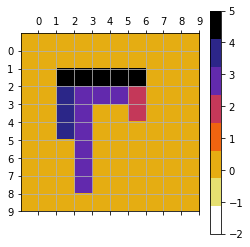

In [4]:
# y, x notation
board[2, 2:7] = 5
board[3:6, 2] = 4
board[3, 3:6] = 3
board[4:9, 3] = 3
board[3:5, 6] = 2



plot_board(board)

In [5]:
def rand_hit():
    rand_x = randint(0, 9)
    rand_y = randint(0, 9)
    print("Shot at (%u, %u)" % (rand_x, rand_y))
    if board[rand_y, rand_x] != 0:
        print("Hit")
        board[rand_y, rand_x] = -1
    else:
        print("Missed")
        board[rand_y, rand_x] = -2
    plot_board(board)

Shot at (6, 2)
Hit


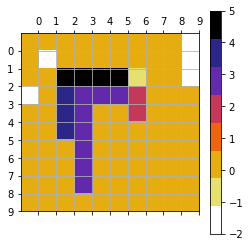

In [11]:
rand_hit()

In [ ]:
class Board():

    def __init__(self):
        self.board = np.zeros(shape=(10,10))

        self.ships = {'carrier': np.ones(shape=(1,5)),
                'battleship': np.ones(shape=(1,4)),
                'cruser': np.ones(shape=(1,3)),
                'submarine': np.ones(shape=(1,3)),
                'destroyer': np.ones(shape=(1,2))
                }
        small_letters = list(map(chr, range(ord('a'), ord('z')+1)))
        self.letters = dict(zip(small_letters, map(lambda letter: str(ord(letter)-96), small_letters)))

    def place_ship(self, name, orientation, num, letter):
        try:
            if orientation == 'hor':
                ship = np.pad(self.ships[name], (num-1, (10-(num-1)-self.ships[name].shape()[1])), 'constant', constant_values=(0, 0) )
                self.board = self.board[:,self.letters[letter]-1] + ship

            elif orientation == 'ver':
                # transpose this for vertical ships
                ship = np.pad(ships[name],(num-1,10-(num-1)-ship[name].shape()[5]))
                self.board =  self.board[:,self.letters[letter]-1] + ship

            else:
                print('Bad orientation.')

        except:
            pass



    def hit(self, num, letter):
        if self.board[num,letters[letter]] == 1:
            return True
        else:
            return False

    def show_board(self):
        print(self.board)
        
    def plot_board(self):
        cmap = matplotlib.cm.get_cmap('CMRmap_r', 8)
        plt.matshow(self.board, cmap=cmap)
        plt.xticks(np.arange(0.5, 10.5), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
        plt.yticks(np.arange(0.5, 10.5), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
        plt.grid()
        plt.colorbar()
        plt.clim(-2, 5)
        plt.show()

class Game(Board):
    def __init__(self, name1, name2):
        self.player1 = {name:name1, points:0}
        self.player2 = {name:name2, points:0}

    def win(self,player):